<a href="https://colab.research.google.com/github/ritwiks9635/Tabular_Data_Projects_File/blob/main/Predict_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predict Customer Churn**

## **Import Necessary Libraries**

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/Assignment_Data - ML_Intern_Assignment_Data.csv.csv")
df.head()

,CustomerID,Gender,Age,Tenure,MonthlyCharges,TotalCharges,PaymentMethod,Churn,ServiceUsage1,ServiceUsage2,ServiceUsage3
0,CUST0001,Male,20,5,62.31,2950.41,Credit Card,Yes,59,20,63
1,CUST0002,Female,25,23,118.96,7460.55,Bank Transfer,No,42,41,136
2,CUST0003,Female,25,39,69.20,3064.73,Bank Transfer,No,65,0,165
3,CUST0004,Male,56,47,145.90,2612.22,Cash,No,64,40,169
4,CUST0005,Female,33,69,88.51,4833.99,Cash,No,62,1,54


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      200 non-null    object 
 1   Gender          200 non-null    object 
 2   Age             200 non-null    int64  
 3   Tenure          200 non-null    int64  
 4   MonthlyCharges  200 non-null    float64
 5   TotalCharges    200 non-null    float64
 6   PaymentMethod   200 non-null    object 
 7   Churn           200 non-null    object 
 8   ServiceUsage1   200 non-null    int64  
 9   ServiceUsage2   200 non-null    int64  
 10  ServiceUsage3   200 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 17.3+ KB


##**Exploratory Data Analysis (EDA)**

**Check for Missing Values**

In [ ]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Tenure,0
MonthlyCharges,0
TotalCharges,0
PaymentMethod,0
Churn,0
ServiceUsage1,0
ServiceUsage2,0


**Monthly Charges Distribution**

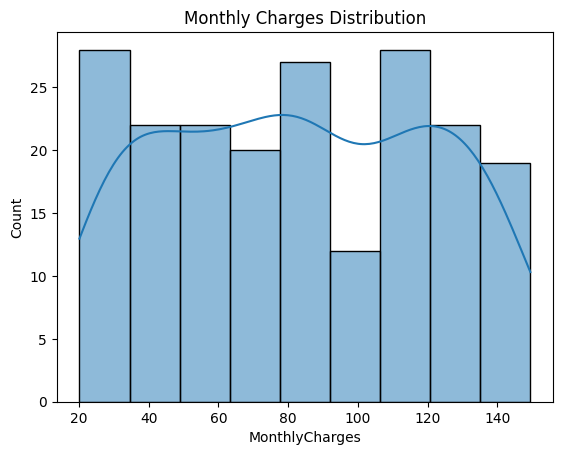

In [ ]:
# Plot distribution of MonthlyCharges
sns.histplot(df['MonthlyCharges'], kde=True)
plt.title('Monthly Charges Distribution')
plt.show()

In [ ]:
df["Churn"].value_counts()

,count
Churn,
No,158
Yes,42


**Churn Distribution**

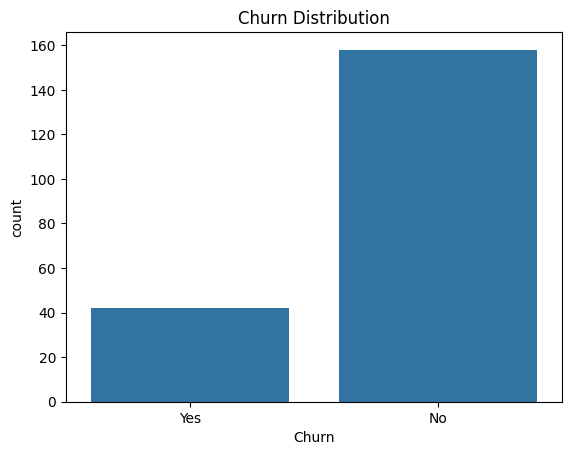

In [ ]:
# Count plot for Churn
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

**Tenure vs Monthly Charges relationship**

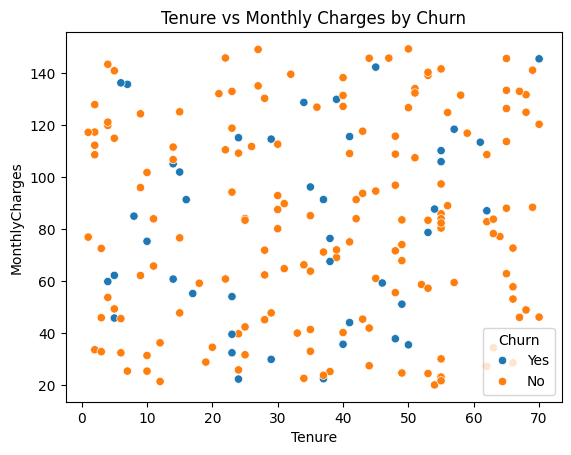

In [ ]:
# Scatter plot of Tenure vs MonthlyCharges
sns.scatterplot(x='Tenure', y='MonthlyCharges', hue='Churn', data=df)
plt.title('Tenure vs Monthly Charges by Churn')
plt.show()

**Payment Method Distribution**

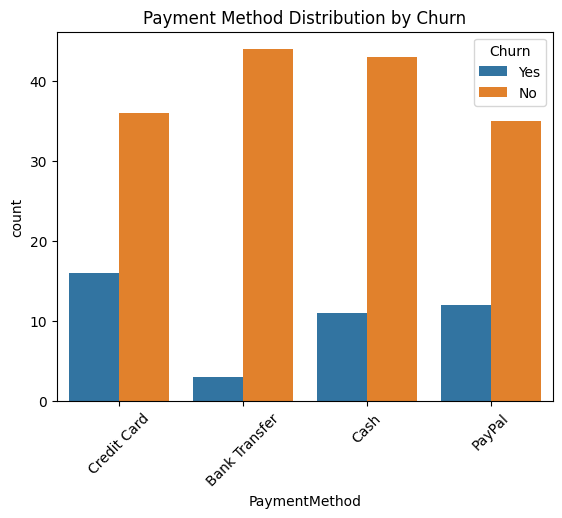

In [ ]:
# PaymentMethod distribution
sns.countplot(x='PaymentMethod', data=df, hue='Churn')
plt.title('Payment Method Distribution by Churn')
plt.xticks(rotation=45)
plt.show()

**Distribution of Monthly Charges by Churn**

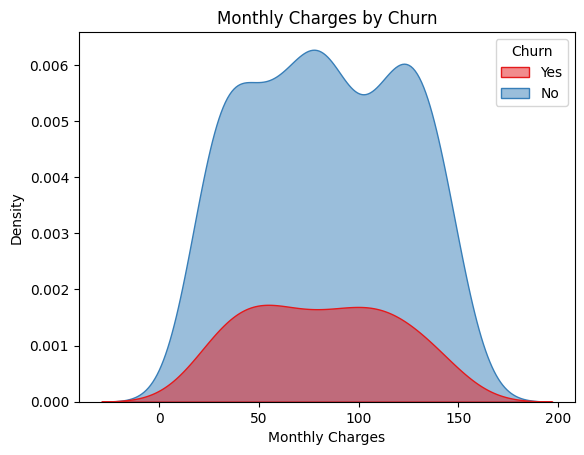

In [ ]:
sns.kdeplot(data=df, x='MonthlyCharges', hue='Churn', fill=True, alpha=0.5, palette='Set1')
plt.title('Monthly Charges by Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.show()

**Tenure Distribution**

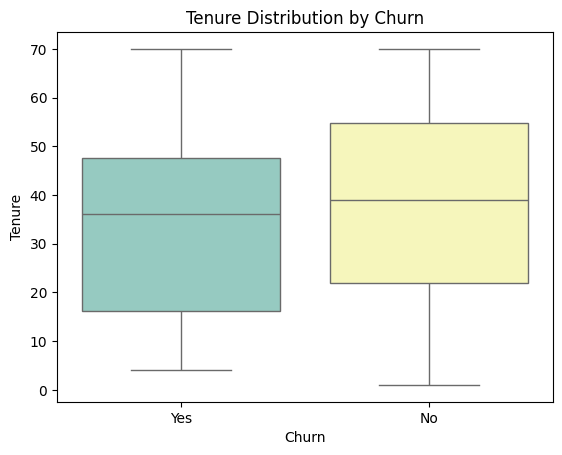

In [ ]:
sns.boxplot(x='Churn', y='Tenure', data=df, palette='Set3')
plt.title('Tenure Distribution by Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.show()

**Relationship Between TotalCharges and MonthlyCharges**

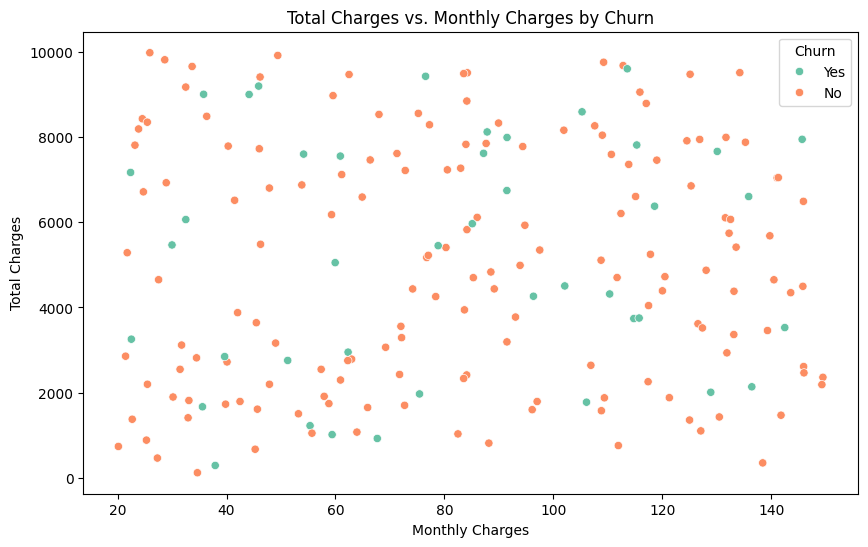

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn', palette='Set2')
plt.title('Total Charges vs. Monthly Charges by Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.show()

**Payment Method Distribution**

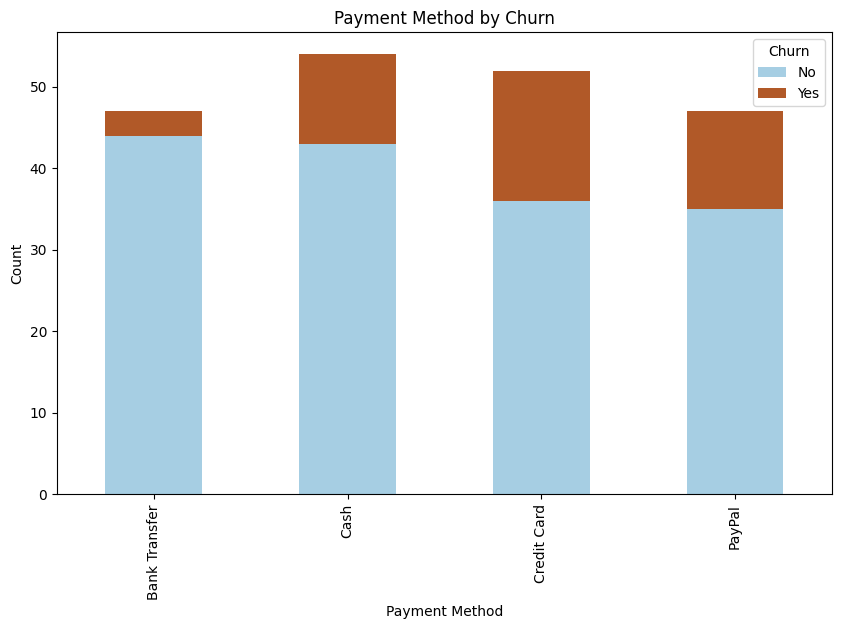

In [ ]:
payment_churn = df.groupby(['PaymentMethod', 'Churn']).size().unstack()
payment_churn.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Paired')
plt.title('Payment Method by Churn')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()

**Service Usage Patterns**

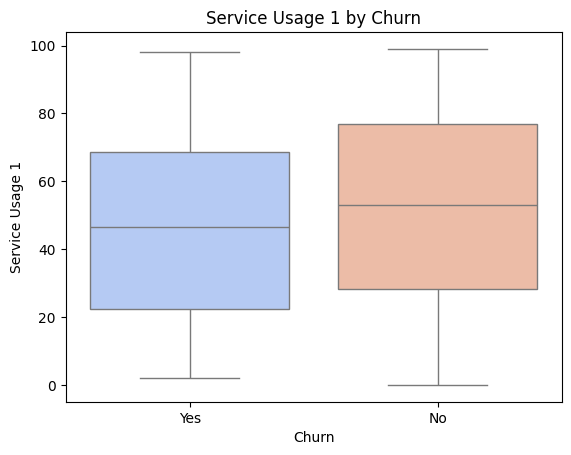

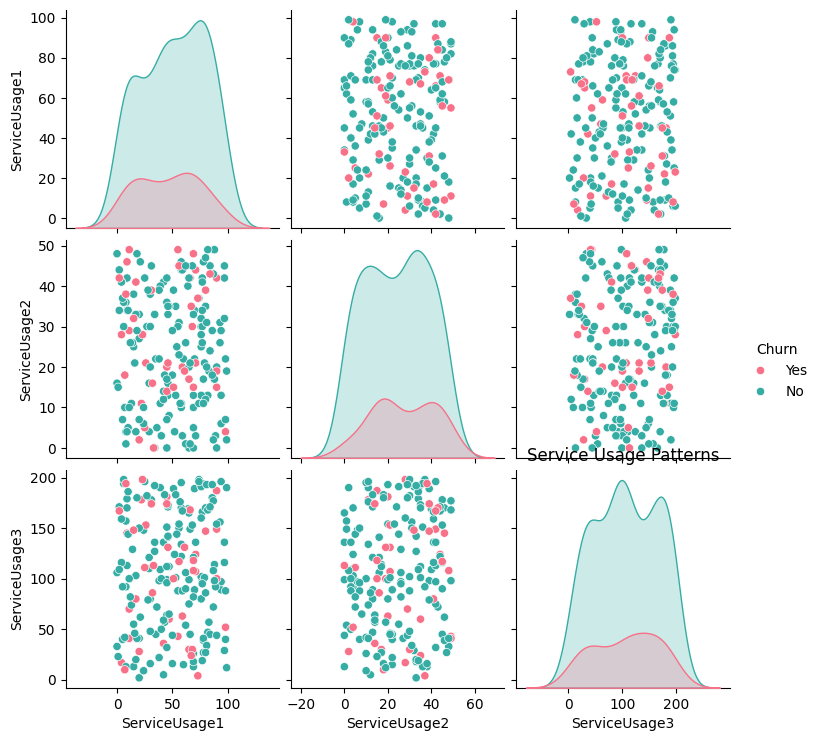

In [ ]:
# Boxplot for ServiceUsage1
sns.boxplot(x='Churn', y='ServiceUsage1', data=df, palette='coolwarm')
plt.title('Service Usage 1 by Churn')
plt.xlabel('Churn')
plt.ylabel('Service Usage 1')
plt.show()

# Pairplot for all service usage features
sns.pairplot(df, vars=['ServiceUsage1', 'ServiceUsage2', 'ServiceUsage3'], hue='Churn', palette='husl')
plt.title('Service Usage Patterns')
plt.show()

**Churn Rate Across Categorical Features**

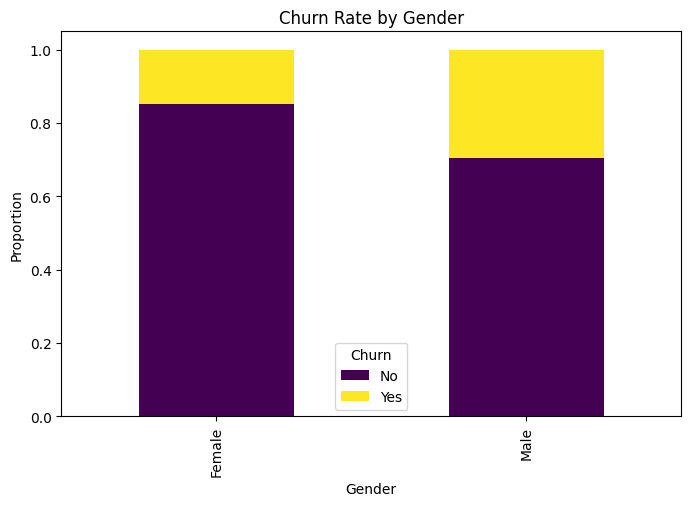

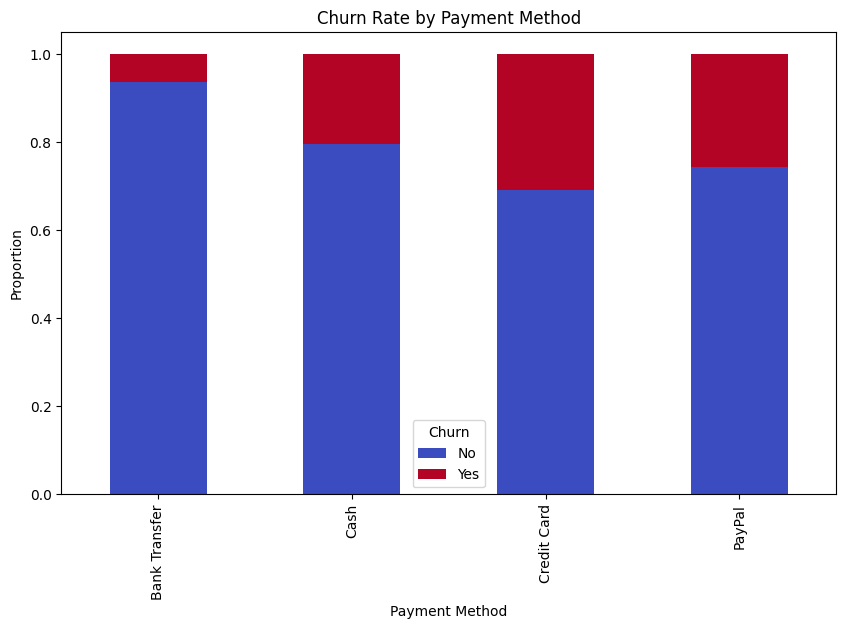

In [ ]:
# Gender
gender_churn = df.groupby('Gender')['Churn'].value_counts(normalize=True).unstack()
gender_churn.plot(kind='bar', figsize=(8, 5), stacked=True, colormap='viridis')
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.legend(title='Churn')
plt.show()

# Payment Method
payment_churn = df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack()
payment_churn.plot(kind='bar', figsize=(10, 6), stacked=True, colormap='coolwarm')
plt.title('Churn Rate by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Proportion')
plt.legend(title='Churn')
plt.show()

## **Feature Engineering**

In [ ]:
# Encode categorical variables using one-hot encoding
data_encoded = pd.get_dummies(df, columns=['Gender', 'PaymentMethod'], drop_first=True)

data_encoded['Churn'] = data_encoded['Churn'].map({'Yes': 1, 'No': 0})

In [ ]:
data_encoded.head()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges,Churn,ServiceUsage1,ServiceUsage2,ServiceUsage3,Gender_Male,PaymentMethod_Cash,PaymentMethod_Credit Card,PaymentMethod_PayPal
0,CUST0001,20,5,62.31,2950.41,1,59,20,63,True,False,True,False
1,CUST0002,25,23,118.96,7460.55,0,42,41,136,False,False,False,False
2,CUST0003,25,39,69.20,3064.73,0,65,0,165,False,False,False,False
3,CUST0004,56,47,145.90,2612.22,0,64,40,169,True,True,False,False
4,CUST0005,33,69,88.51,4833.99,0,62,1,54,False,True,False,False


**Standardize Data**

In [ ]:
from sklearn.preprocessing import StandardScaler

num_cols = ['Age', 'Tenure', 'MonthlyCharges', 'TotalCharges', 'ServiceUsage1', 'ServiceUsage2', 'ServiceUsage3']

scaler = StandardScaler()
data_encoded[num_cols] = scaler.fit_transform(data_encoded[num_cols])

In [ ]:
os.makedirs("models")

In [ ]:
import pickle
# Save the scaler
with open('/content/models/rfr_scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

**Detect outliers using IQR**

In [ ]:
def detect_outliers_iqr(df, columns):
    outlier_indices = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_indices[col] = outliers.index.tolist()
    return outlier_indices


outliers = detect_outliers_iqr(data_encoded, num_cols)


for column, indices in outliers.items():
    print(f"Outliers in '{column}': {len(indices)} rows -> {indices if len(indices) < 10 else indices[:10]}...")

print("")

Outliers in 'Age': 0 rows -> []...
Outliers in 'Tenure': 0 rows -> []...
Outliers in 'MonthlyCharges': 0 rows -> []...
Outliers in 'TotalCharges': 0 rows -> []...
Outliers in 'ServiceUsage1': 0 rows -> []...
Outliers in 'ServiceUsage2': 0 rows -> []...
Outliers in 'ServiceUsage3': 0 rows -> []...



**Create new features**

In [ ]:
data_encoded['AverageSpend'] = data_encoded['TotalCharges'] / (data_encoded['Tenure'] + 1e-5)  # Avoid division by zero
data_encoded['TotalUsage'] = data_encoded['ServiceUsage1'] + data_encoded['ServiceUsage2'] + data_encoded['ServiceUsage3']

**Drop irrelevant columns**

In [ ]:
data_encoded.drop(columns=['CustomerID'], inplace=True)

**Correlation Heatmap**

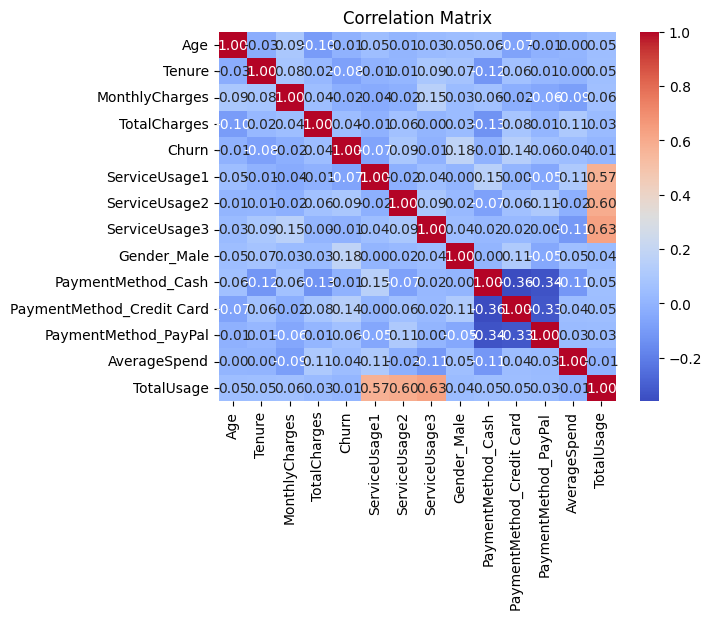

In [ ]:
# Correlation heatmap
corr_matrix = data_encoded.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
data_encoded.head()

,Age,Tenure,MonthlyCharges,TotalCharges,Churn,ServiceUsage1,ServiceUsage2,ServiceUsage3,Gender_Male,PaymentMethod_Cash,PaymentMethod_Credit Card,PaymentMethod_PayPal,AverageSpend,TotalUsage
0,-1.484979,-1.527311,-0.546301,-0.747861,1,0.303786,-0.325171,-0.761761,True,False,True,False,0.489662,-0.783147
1,-1.153659,-0.638909,0.951290,0.865549,0,-0.289819,1.129268,0.499204,False,False,False,False,-1.354750,1.338654
2,-1.153659,0.150782,-0.364158,-0.706965,0,0.513293,-1.710351,1.000136,False,False,False,False,-4.688359,-0.196922
3,0.900530,0.545627,1.663473,-0.868841,0,0.478375,1.060009,1.069230,True,True,False,False,-1.592343,2.607614
4,-0.623546,1.631452,0.146319,-0.074049,0,0.408539,-1.641092,-0.917223,False,True,False,False,-0.045388,-2.149775


In [ ]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        200 non-null    float64
 1   Tenure                     200 non-null    float64
 2   MonthlyCharges             200 non-null    float64
 3   TotalCharges               200 non-null    float64
 4   Churn                      200 non-null    int64  
 5   ServiceUsage1              200 non-null    float64
 6   ServiceUsage2              200 non-null    float64
 7   ServiceUsage3              200 non-null    float64
 8   Gender_Male                200 non-null    bool   
 9   PaymentMethod_Cash         200 non-null    bool   
 10  PaymentMethod_Credit Card  200 non-null    bool   
 11  PaymentMethod_PayPal       200 non-null    bool   
 12  AverageSpend               200 non-null    float64
 13  TotalUsage                 200 non-null    float64

## **Predictive Modeling**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

**Split Dataset**

In [ ]:
X = data_encoded.drop(columns=['Churn'])
y = data_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(f"Training set distribution:\n{y_train.value_counts()}")
print(f"Test set distribution:\n{y_test.value_counts()}")

Training set distribution:
Churn
0    126
1     34
Name: count, dtype: int64
Test set distribution:
Churn
0    32
1     8
Name: count, dtype: int64


**Handle Imbalanced Data**

In [ ]:
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print(f"Balanced training set distribution:\n{y_train_balanced.value_counts()}")

Balanced training set distribution:
Churn
0    126
1    126
Name: count, dtype: int64


**Build Model Pipeline**

In [ ]:
# Logistic Regression
pipeline_lr = Pipeline([
    ('log_reg', LogisticRegression(random_state=42))
])

# Decision Tree
pipeline_dt = Pipeline([
    ('dec_tree', DecisionTreeClassifier(random_state=42))
])

# Random Forest
pipeline_rf = Pipeline([
    ('rand_forest', RandomForestClassifier(random_state=42))
])

In [ ]:
def evaluate_model(pipeline, X_train, y_train, X_test, y_test):
    # Train the model
    pipeline.fit(X_train, y_train)

    # Predictions
    y_pred = pipeline.predict(X_test)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

In [ ]:
print("Logistic Regression Results:")
evaluate_model(pipeline_lr, X_train_balanced, y_train_balanced, X_test, y_test)

print("\nDecision Tree Results:")
evaluate_model(pipeline_dt, X_train_balanced, y_train_balanced, X_test, y_test)

print("\nRandom Forest Results:")
evaluate_model(pipeline_rf, X_train_balanced, y_train_balanced, X_test, y_test)

Logistic Regression Results:
Accuracy: 0.6500
Precision: 0.2000
Recall: 0.2500
F1-Score: 0.2222

Confusion Matrix:
[[24  8]
 [ 6  2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.75      0.77        32
           1       0.20      0.25      0.22         8

    accuracy                           0.65        40
   macro avg       0.50      0.50      0.50        40
weighted avg       0.68      0.65      0.66        40


Decision Tree Results:
Accuracy: 0.6000
Precision: 0.1667
Recall: 0.2500
F1-Score: 0.2000

Confusion Matrix:
[[22 10]
 [ 6  2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.69      0.73        32
           1       0.17      0.25      0.20         8

    accuracy                           0.60        40
   macro avg       0.48      0.47      0.47        40
weighted avg       0.66      0.60      0.63        40


Random Forest Results:
Accuracy: 0

## **Improving Model Results Using Bayesian Optimization**

In [ ]:
!pip install scikit-optimize

In [ ]:
from skopt import BayesSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
param_space = {
    'n_estimators': (50, 500),
    'max_depth': (3, 50),
    'min_samples_split': (2, 20),
    'min_samples_leaf': (1, 20),
    'max_features': ['sqrt', 'log2', None]
}

In [ ]:
bayes_search = BayesSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    search_spaces=param_space,
    n_iter=32,
    scoring='f1',
    cv=5,
    random_state=42,
    n_jobs=-1
)


bayes_search.fit(X_train_balanced, y_train_balanced)

print("Best Hyperparameters:", bayes_search.best_params_)

Best Hyperparameters: OrderedDict([('max_depth', 50), ('max_features', 'sqrt'), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 50)])


In [ ]:
# Best model from the search
best_rf = bayes_search.best_estimator_

y_pred_optimized = best_rf.predict(X_test)

# Evaluate the optimized model
print("Optimized Random Forest Results:")
evaluate_model(best_rf, X_train_balanced, y_train_balanced, X_test, y_test)

Optimized Random Forest Results:
Accuracy: 0.7750
Precision: 0.3333
Recall: 0.1250
F1-Score: 0.1818

Confusion Matrix:
[[30  2]
 [ 7  1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87        32
           1       0.33      0.12      0.18         8

    accuracy                           0.78        40
   macro avg       0.57      0.53      0.53        40
weighted avg       0.72      0.78      0.73        40



In [ ]:
# Save the Randon Forest model
with open('models/best_rf_model.pkl', 'wb') as file:
    pickle.dump(best_rf, file)
print("RandomForest model saved as 'best_rf_model.pkl'")

RandomForest model saved as 'best_rf_model.pkl'


## **Model Interpretation**

For model interpretation, we use SHAP (SHapley Additive exPlanations), which explains the contribution of each feature to the prediction.

In [ ]:
!pip install shap

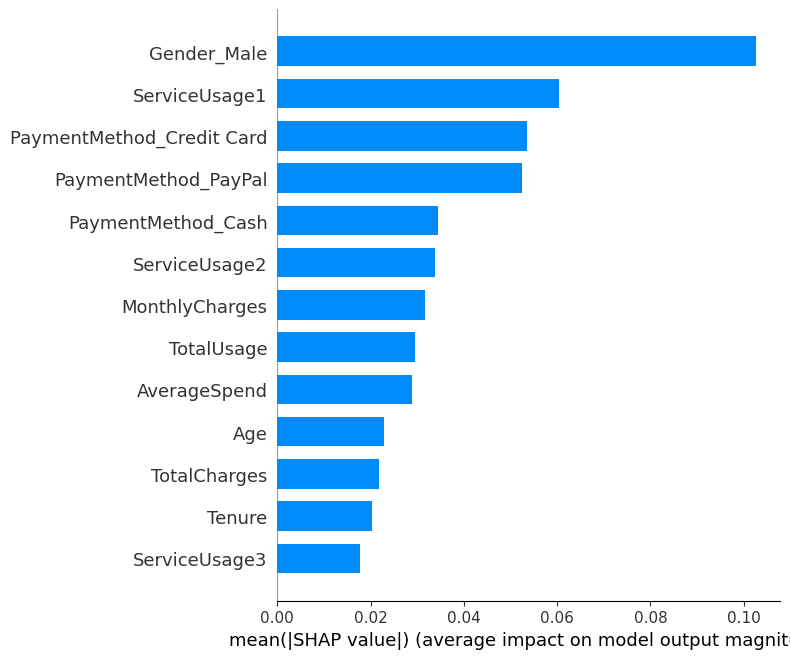

In [ ]:
import shap

# Explain the model predictions
explainer = shap.TreeExplainer(best_rf)
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values[:, :, 1], X_test, plot_type='bar')

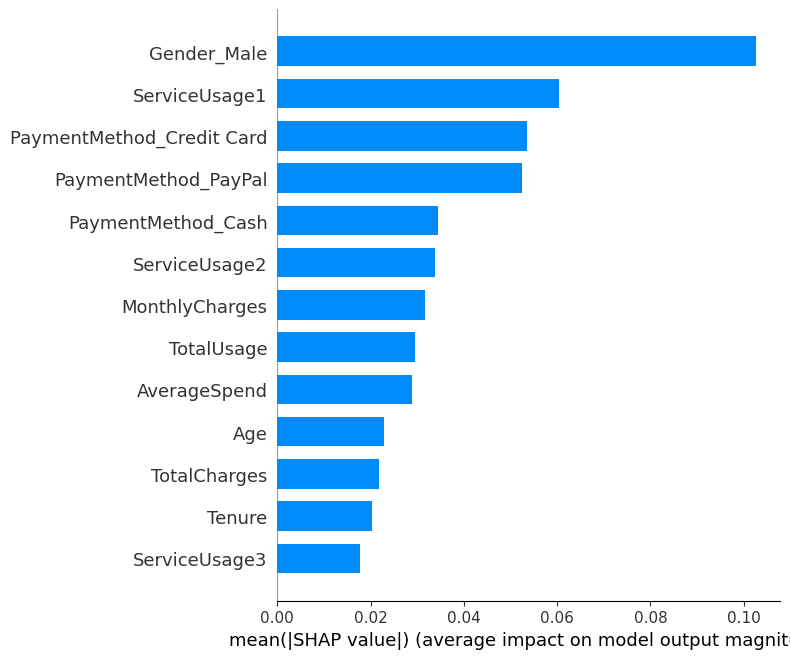

In [ ]:
shap.summary_plot(shap_values[:, :, 0], X_test, plot_type='bar')

## **Recommendation Engine**

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
service_data = df[['ServiceUsage1', 'ServiceUsage2', 'ServiceUsage3']]

service_data_normalized = scaler.fit_transform(service_data)

In [ ]:
similarity_matrix = cosine_similarity(service_data_normalized)

similarity_df = pd.DataFrame(similarity_matrix, index=df['CustomerID'], columns=df['CustomerID'])
similarity_df.head()

CustomerID,CUST0001,CUST0002,CUST0003,CUST0004,CUST0005,CUST0006,CUST0007,CUST0008,CUST0009,CUST0010,...,CUST0191,CUST0192,CUST0193,CUST0194,CUST0195,CUST0196,CUST0197,CUST0198,CUST0199,CUST0200
CustomerID,,,,,,,,,,,,,,,,,,,,,
CUST0001,1.000000,-0.746759,-0.027568,-0.727454,0.799185,0.977846,0.398314,0.916239,0.359619,0.806348,...,-0.809586,-0.220250,0.423689,0.529721,-0.328435,-0.379059,-0.114188,-0.697632,0.324243,-0.828214
CUST0002,-0.746759,1.000000,-0.609050,0.794667,-0.995714,-0.868298,-0.889743,-0.803869,-0.041859,-0.492231,...,0.669880,0.743219,0.256151,-0.954222,0.076017,0.575947,0.634058,0.200452,-0.704448,0.803982
CUST0003,-0.027568,-0.609050,1.000000,-0.154039,0.533106,0.178164,0.761572,0.259958,-0.611382,0.003588,...,-0.256403,-0.676228,-0.736174,0.742762,0.541910,-0.145204,-0.955578,0.645612,0.855061,-0.397230
CUST0004,-0.727454,0.794667,-0.154039,1.000000,-0.830726,-0.774523,-0.752227,-0.529560,-0.630146,-0.198923,...,0.294670,0.741587,0.178605,-0.770335,0.663580,0.908266,0.078174,0.628902,-0.131247,0.429594
CUST0005,0.799185,-0.995714,0.533106,-0.830726,1.000000,0.904948,0.861141,0.826019,0.117270,0.522873,...,-0.683058,-0.715342,-0.188848,0.931789,-0.145771,-0.599198,-0.564310,-0.289432,0.650716,-0.809993


In [ ]:
def recommend_customers(customer_id, top_n=5):
    if customer_id not in similarity_df.index:
        print("Customer ID not found.")
        return []

    similar_customers = similarity_df[customer_id].sort_values(ascending=False)

    return similar_customers.iloc[1:top_n+1].index.tolist()

customer_id = 'CUST0001'
recommendations = recommend_customers(customer_id, top_n=5)
print(f"Recommendations for {customer_id}: {recommendations}")

Recommendations for CUST0001: ['CUST0032', 'CUST0188', 'CUST0006', 'CUST0092', 'CUST0064']


##**Deployment Simulation**

In [ ]:
!pip install flask-ngrok

In [ ]:
from flask import Flask, request, jsonify
import pickle
import numpy as np

# Load the trained model (best random forest model)
with open('models/best_rf_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Load the scaler
with open('models/rfr_scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

# Initialize Flask app
app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():

    data = request.json

    # Extract features
    features = [
        data['Age'],
        data['Tenure'],
        data['MonthlyCharges'],
        data['TotalCharges'],
        data['ServiceUsage1'],
        data['ServiceUsage2'],
        data['ServiceUsage3'],
        data['Gender_Male'],
        data['PaymentMethod_Bank Transfer'],
        data['PaymentMethod_Cash'],
        data['PaymentMethod_Credit Card']
    ]

    # Scale features
    features = np.array(features).reshape(1, -1)
    features = scaler.transform(features)

    # Make prediction
    prediction = model.predict(features)
    probability = model.predict_proba(features)[0][1]

    # Return response
    return jsonify({
        'Churn Prediction': int(prediction[0]),
        'Churn Probability': round(probability, 4)
    })

if __name__ == '__main__':
    app.run(debug = True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


```
!curl -X POST http://127.0.0.1:5000/predict -H "Content-Type: application/json" -d '{
    "Age": 30,
    "Tenure": 12,
    "MonthlyCharges": 75.5,
    "TotalCharges": 906.0,
    "ServiceUsage1": 50,
    "ServiceUsage2": 10,
    "ServiceUsage3": 30,
    "Gender_Male": 1,
    "PaymentMethod_Bank Transfer": 0,
    "PaymentMethod_Cash": 1,
    "PaymentMethod_Credit Card": 0
}'
```